In [1]:
import os
import pandas as pd
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

### Inputs

In [2]:
# Read  hype ET
hype = pd.read_csv('C:/Users/Paul Coderre/Documents/Thesis/Final Models/02_Results/opt_hype/timeEVAP_DD.txt',delimiter='\t',index_col=0,skiprows=1)

In [3]:
# read modified shapefile
gdf = gpd.read_file('../../geospacial/shapefiles/modified_shapefiles/Modified_SMMcat.shp')

### Read MODIS


In [4]:
# Directory containing CSV files
directory = "C:/Users/Paul Coderre/Documents/Thesis/Validation/hype_mean/MOD16A3GF.061"

# Initialize an empty dataframe to store the merged data
merged_df = pd.DataFrame()

# Get a list of all CSV files in the directory
csv_files = glob(os.path.join(directory, '*.csv'))

In [5]:
# Iterate through each CSV file in the directory
for file_name in csv_files[:]:  # Make a copy of the list to iterate over
    # Read the CSV file into a dataframe
    df = pd.read_csv(file_name, index_col=0)
    
    # Extract the index and column name from the file name
    index_name = os.path.splitext(os.path.basename(file_name))[0]
    
    # If merged_df is empty, directly assign df to it
    if merged_df is None:
        merged_df = df
    else:
        # Merge only the first column of df with merged_df based on the index
        merged_df[index_name] = df.iloc[:, 0]
    
    # Remove the processed file from the list
    csv_files.remove(file_name)

In [6]:
# Rename columns to year
new_columns = {}
for column in merged_df.columns:
    year = column.split('_')[-1]  # Extract year from column name
    new_columns[column] = int(year)  # Convert year to integer and assign as new column name
merged_df.rename(columns=new_columns, inplace=True)

In [7]:
# Sort DataFrame by column names (years)
merged_df = merged_df.sort_index(axis=1)

In [8]:
# Multiply every value in the DataFrame by 0.1
obs_scaled = merged_df * 0.1

In [9]:
# Extract two columns from GeoDataFrame to create a renaming key
renaming_key = gdf[['hru_nhm', 'seg_nhm']]

In [10]:
# Set 'nhm_id' as the index in renaming key DataFrame
renaming_key.set_index('hru_nhm', inplace=True)

In [11]:
# Rename index values in DataFrame using the renaming key
obs_scaled.index = obs_scaled.index.map(renaming_key['seg_nhm'])

In [12]:
# Convert index to integers
obs_scaled.index = obs_scaled.index.astype(int)

# Sort index in ascending order
obs_scaled = obs_scaled.sort_index()

In [13]:
obs_scaled = obs_scaled.transpose()

In [14]:
# Remove index title
obs_scaled.index.name = None

In [15]:
# Convert column headers to integers
obs_scaled.columns = obs_scaled.columns.astype(int)

In [16]:
# Sort columns in ascending order
obs_scaled = obs_scaled.sort_index(axis=1)

In [17]:
obs_scaled

hru_nhm,58183,58184,58185,58186,58188,58189,58192,58193,58194,58197,...,58666,58667,58668,58669,58670,58671,58672,58673,58674,58675
2001,332.064111,264.741162,250.659985,273.547168,269.762622,308.438916,370.807983,308.406714,636.336719,363.258667,...,228.000903,226.658594,225.455127,242.922192,237.672656,262.219287,224.179321,228.616650,214.936230,228.283740
2002,434.820459,391.405786,376.792700,384.733887,372.000098,416.517432,488.153125,431.039258,714.951758,459.024023,...,330.287354,325.221313,326.064258,332.649341,348.961206,355.243115,337.641504,347.567798,297.192944,324.134058
2003,400.433887,341.091113,323.080591,348.669873,343.875806,375.080566,451.266553,365.901245,679.936133,414.342920,...,268.610913,260.264844,291.239014,295.967041,298.127588,322.713379,276.996558,281.378027,285.565942,261.587183
2004,411.697070,386.045654,351.604346,373.451855,364.999194,425.408301,485.949316,412.612549,722.804297,444.505762,...,319.304980,316.273267,318.988184,344.209985,355.307129,361.282397,318.239209,325.334131,291.525293,308.806519
2005,427.042822,403.548657,378.779004,383.682251,379.551611,413.931934,486.934961,406.642188,700.310303,453.947266,...,324.636206,304.010669,327.952539,351.381470,348.486011,367.276733,316.615796,319.182104,287.271289,311.656787
2006,439.619775,420.011182,386.341748,400.543799,406.921533,450.528906,520.604883,431.644727,734.581885,476.501855,...,291.309204,281.805542,283.325903,303.352271,309.015161,322.038013,290.837573,304.564551,291.778271,272.718823
2007,399.799878,356.901782,338.789038,352.047778,347.781079,380.180859,469.290820,382.428027,705.168555,430.988818,...,282.438184,301.299585,301.352222,300.143140,310.482837,328.598755,307.553687,315.263940,282.606665,297.104077
2008,447.006982,409.840186,376.940698,382.070386,378.788843,433.038770,501.351611,423.586768,734.308887,479.580225,...,286.248755,270.625415,291.708472,297.713501,300.764014,329.546045,294.310620,304.538867,295.960132,275.832324
2009,404.834424,375.348169,354.553882,360.450659,345.471509,403.924780,470.765332,402.062012,708.324512,467.595508,...,282.506348,272.962695,293.130688,297.796313,292.341260,324.624805,287.054077,292.451050,291.843555,272.714185
2010,426.915674,383.718066,385.035840,368.742627,396.642554,417.757666,477.861719,405.551099,661.108740,426.522803,...,299.635352,308.127905,295.751343,317.401685,321.026855,329.033545,302.500024,318.799658,315.803491,299.333350


### Analysis

In [18]:
# Convert index to datetime format
hype.index = pd.to_datetime(hype.index)

# Trim dataframe to include only data from 2001 to 2015
hype = hype['2001':'2015']

In [19]:
# Convert index to datetime
hype.index = pd.to_datetime(hype.index)

# Resample to yearly by summing
hype = hype.resample('Y').sum()

In [20]:
# Convert index to datetime
hype.index = pd.to_datetime(hype.index)

# Extract year from datetime index and convert it to integer
hype.index = hype.index.year.astype(int)

In [21]:
# Remove index title
hype.index.name = None

In [22]:
# Convert column headers to integers
hype.columns = hype.columns.astype(int)

In [23]:
# Sort columns in ascending order
hype = hype.sort_index(axis=1)

In [24]:
hype

,58183,58184,58185,58186,58188,58189,58192,58193,58194,58197,...,58666,58667,58668,58669,58670,58671,58672,58673,58674,58675
2001,137.542,200.963,184.087,184.408,165.316,192.942,187.738,188.684,212.429,208.917,...,257.938,247.699,255.522,253.197,251.943,252.987,266.363,250.493,195.103,285.869
2002,244.363,385.999,331.037,348.024,299.650,365.044,330.892,321.987,357.637,316.173,...,454.276,401.816,477.103,445.502,442.579,472.283,460.393,412.288,374.220,405.370
2003,177.168,260.483,236.686,237.692,208.914,239.557,219.100,225.684,237.644,223.575,...,343.351,351.178,381.173,359.456,355.984,417.699,398.457,368.664,318.981,342.299
2004,207.739,318.389,287.926,293.975,261.276,314.800,273.509,284.372,309.286,293.401,...,423.432,451.718,435.562,456.574,461.787,473.043,455.045,444.319,306.760,419.552
2005,205.481,335.199,293.048,304.609,271.713,339.441,302.281,316.736,365.675,338.721,...,351.959,296.592,351.741,345.611,337.161,383.963,373.211,380.927,271.220,343.959
2006,167.901,255.317,230.067,235.231,210.681,249.162,231.309,235.230,256.826,246.292,...,269.194,281.011,266.107,253.374,258.403,250.618,283.284,276.872,226.955,290.262
2007,159.136,248.662,221.814,229.746,203.645,250.490,236.495,229.324,265.602,255.593,...,275.250,265.672,293.866,278.019,277.766,318.048,345.051,351.114,286.932,282.693
2008,214.282,339.892,305.453,309.189,271.756,321.231,294.938,297.335,318.723,264.823,...,316.313,275.614,324.171,311.350,312.713,317.473,331.014,335.141,336.089,305.604
2009,191.584,306.161,272.474,277.272,239.488,283.454,258.851,261.429,298.089,287.181,...,338.847,300.728,356.822,317.527,313.736,356.203,388.809,414.162,372.340,322.453
2010,215.881,348.373,307.156,322.219,286.440,359.796,315.518,334.273,376.711,344.359,...,402.917,383.839,406.349,395.301,398.794,403.725,412.932,440.219,418.512,412.346


In [25]:
# Create a new DataFrame `difference` by subtracting `sca` from `hype`
# change this operation to whatever you want
difference= hype - obs_scaled

In [26]:
difference

,58183,58184,58185,58186,58188,58189,58192,58193,58194,58197,...,58666,58667,58668,58669,58670,58671,58672,58673,58674,58675
2001,-194.522111,-63.778162,-66.572985,-89.139168,-104.446622,-115.496916,-183.069983,-119.722714,-423.907719,-154.341667,...,29.937097,21.040406,30.066873,10.274808,14.270344,-9.232287,42.183679,21.876350,-19.833230,57.585260
2002,-190.457459,-5.406786,-45.755700,-36.709887,-72.350098,-51.473432,-157.261125,-109.052258,-357.314758,-142.851023,...,123.988646,76.594687,151.038742,112.852659,93.617794,117.039885,122.751496,64.720202,77.027056,81.235942
2003,-223.265887,-80.608113,-86.394591,-110.977873,-134.961806,-135.523566,-232.166553,-140.217245,-442.292133,-190.767920,...,74.740087,90.913156,89.933986,63.488959,57.856412,94.985621,121.460442,87.285973,33.415058,80.711817
2004,-203.958070,-67.656654,-63.678346,-79.476855,-103.723194,-110.608301,-212.440316,-128.240549,-413.518297,-151.104762,...,104.127020,135.444733,116.573816,112.364015,106.479871,111.760603,136.805791,118.984869,15.234707,110.745481
2005,-221.561822,-68.349657,-85.731004,-79.073251,-107.838611,-74.490934,-184.653961,-89.906188,-334.635303,-115.226266,...,27.322794,-7.418669,23.788461,-5.770470,-11.325011,16.686267,56.595204,61.744896,-16.051289,32.302213
2006,-271.718775,-164.694182,-156.274748,-165.312799,-196.240533,-201.366906,-289.295883,-196.414727,-477.755885,-230.209855,...,-22.115204,-0.794542,-17.218903,-49.978271,-50.612161,-71.420013,-7.553573,-27.692551,-64.823271,17.543177
2007,-240.663878,-108.239782,-116.975038,-122.301778,-144.136079,-129.690859,-232.795820,-153.104027,-439.566555,-175.395818,...,-7.188184,-35.627585,-7.486222,-22.124140,-32.716837,-10.550755,37.497313,35.850060,4.325335,-14.411077
2008,-232.724982,-69.948186,-71.487698,-72.881386,-107.032843,-111.807770,-206.413611,-126.251768,-415.585887,-214.757225,...,30.064245,4.988585,32.462528,13.636499,11.948986,-12.073045,36.703380,30.602133,40.128868,29.771676
2009,-213.250424,-69.187169,-82.079882,-83.178659,-105.983509,-120.470780,-211.914332,-140.633012,-410.235512,-180.414508,...,56.340652,27.765305,63.691312,19.730687,21.394740,31.578195,101.754923,121.710950,80.496445,49.738815
2010,-211.034674,-35.345066,-77.879840,-46.523627,-110.202554,-57.961666,-162.343719,-71.278099,-284.397740,-82.163803,...,103.281648,75.711095,110.597657,77.899315,77.767145,74.691455,110.431976,121.419342,102.708509,113.012650


In [27]:
mean_annual_difference= difference.mean()

In [28]:
# Convert difference Series to a DataFrame
mean_annual_difference_df = pd.DataFrame(mean_annual_difference, columns=['Mean'])

In [29]:
mean_annual_difference_df.max()

Mean    136.241563
dtype: float64

In [30]:
mean_annual_difference_df.min()

Mean   -1981.143995
dtype: float64

In [31]:
# Find the index of the minimum value
min_index=mean_annual_difference_df.idxmin()
min_index

Mean    58651
dtype: int64

In [32]:
mean_annual_difference_df.mean()

Mean    14.725561
dtype: float64

In [33]:
mean_annual_difference_df.median()

Mean    61.850264
dtype: float64

In [34]:
# Calculate Q1, Q3, and IQR
Q1 = mean_annual_difference_df['Mean'].quantile(0.25)
Q3 = mean_annual_difference_df['Mean'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 6 * IQR
upper_bound = Q3 + 6 * IQR

# Find outliers
outliers = mean_annual_difference_df[(mean_annual_difference_df['Mean'] < lower_bound) | (mean_annual_difference_df['Mean'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print('Max outlier:', outliers.max())
print('Min outlier:', outliers.min())
print("Number of outliers:", outliers.shape[0])
print("Outliers:")
print(outliers)

Lower Bound: -344.25606953125026
Upper Bound: 465.11830898437523
Max outlier: Mean   -367.363509
dtype: float64
Min outlier: Mean   -1981.143995
dtype: float64
Number of outliers: 14
Outliers:
              Mean
58194  -403.650059
58210  -367.363509
58212  -625.052983
58213 -1754.836651
58214  -680.830497
58219  -487.720904
58223  -392.700945
58265 -1274.803950
58284  -847.766828
58429  -888.333473
58444  -670.923817
58453  -857.676764
58505 -1323.586948
58651 -1981.143995


In [35]:
# Replace outliers with NaN
mean_annual_difference_df.loc[(mean_annual_difference_df['Mean'] < lower_bound) | (mean_annual_difference_df['Mean'] > upper_bound), 'Mean'] = np.nan

### Plot heatmap

In [36]:
# Merge column_means_df onto gdf by the index in column_means_df and seg_nhm column in gdf
merged_gdf = gdf.merge(mean_annual_difference_df, left_on='seg_nhm', right_index=True)

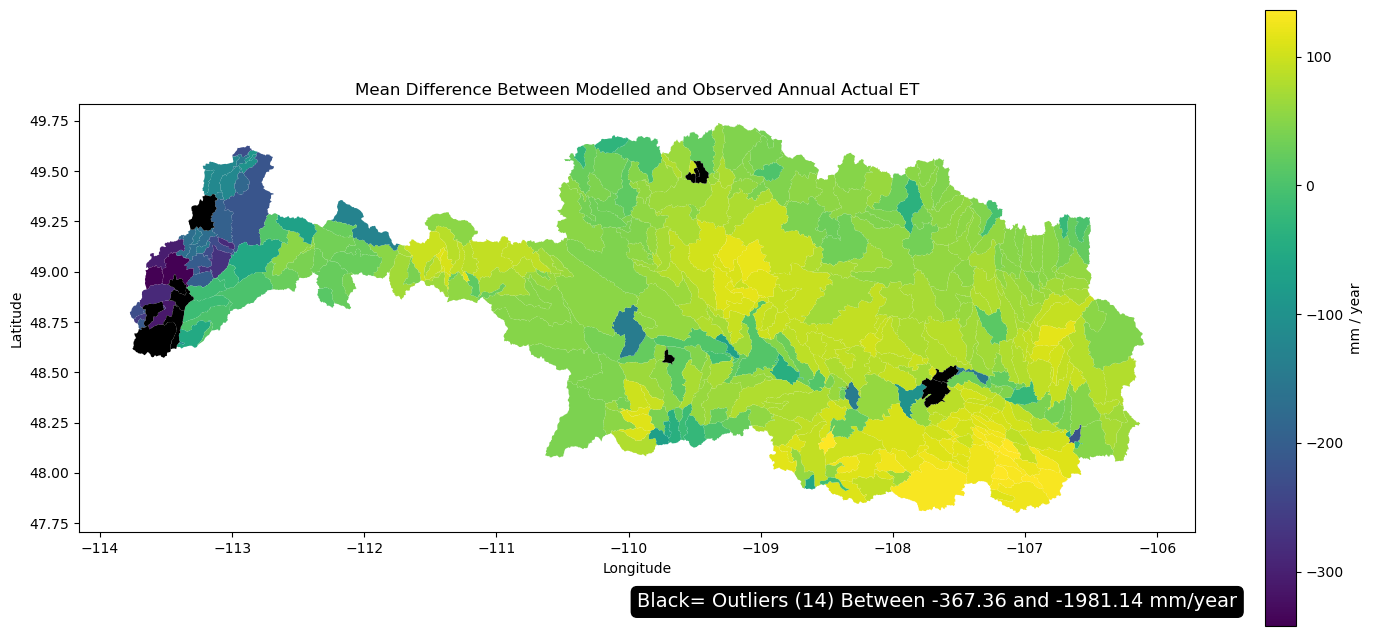

In [37]:
nan_color = 'black'  

# Plot a heatmap of the 'Mean' column with adjusted figure size
ax = merged_gdf.plot(column='Mean', cmap='viridis', legend=True, figsize=(18, 8),missing_kwds={'color': nan_color})

# Add title to the plot
ax.set_title('Mean Difference Between Modelled and Observed Annual Actual ET')

# Get the color bar instance
cbar = ax.get_figure().get_axes()[1]

# Add units to the color bar
cbar.set_ylabel('mm / year')

# Manually draw a black box with text to represent NaN values
ax.text(0.5, -0.175, 'Black= Outliers (14) Between -367.36 and -1981.14 mm/year', transform=ax.transAxes, color='white', fontsize=14,
        bbox=dict(facecolor='black', alpha=1, boxstyle='round,pad=0.3'))

# Add units for lat and lon (assuming you want to annotate the axes)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Save the plot as PNG to a specific location
plt.savefig('./02_hype_et.png')

# Show the plot
plt.show()